<a href="https://colab.research.google.com/github/Maurice912/DATA_preprocessing_project/blob/main/notebooks/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 – Load and Explore Kaggle Dataset




In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_preprocessing/population_data.csv')

In [ ]:
# Preview data
print("Preview of the data:")
display(df.head())

# Show dataset shape
print(f"\nDataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Show dataset info
print("\nDataset info:")
df.info()

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

# Column names
print("\nColumn names:")
print(df.columns.tolist())

Preview of the data:


,id,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,1463865525,0.89%,12929734,492,2973190,"−495,753",1.94,28.8,37.1%,17.78%
1,2,China,1416096094,−0.23%,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%
3,4,Indonesia,285721236,0.79%,2233305,158,1811570,"−39,509",2.10,30.4,59.6%,3.47%
4,5,Pakistan,255219554,1.57%,3950390,331,770880,"−1,235,336",3.50,20.6,34.4%,3.10%



Dataset shape: 233 rows and 12 columns

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       233 non-null    int64  
 1   Country (or dependency)  233 non-null    object 
 2   Population 2025          233 non-null    int64  
 3   Yearly Change            233 non-null    object 
 4   Net Change               233 non-null    object 
 5   Density (P/Km²)          233 non-null    int64  
 6   Land Area (Km²)          233 non-null    int64  
 7   Migrants (net)           233 non-null    object 
 8   Fert. Rate               233 non-null    float64
 9   Median Age               233 non-null    float64
 10  Urban Pop %              210 non-null    object 
 11  World Share              233 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 22.0+ KB

Summary statistics:


,id,Population 2025,Density (P/Km²),Land Area (Km²),Fert. Rate,Median Age
count,233.000000,2.330000e+02,233.000000,2.330000e+02,233.000000,233.000000
mean,117.000000,3.532080e+07,487.673820,5.583427e+05,2.306094,31.896996
std,67.405489,1.391905e+08,2412.937646,1.694270e+06,1.134316,9.860936
min,1.000000,5.010000e+02,0.000000,0.000000e+00,0.690000,14.500000
25%,59.000000,4.663300e+05,38.000000,2.830000e+03,1.470000,22.900000
50%,117.000000,5.731206e+06,98.000000,8.220000e+04,1.940000,32.800000
75%,175.000000,2.407458e+07,256.000000,4.103400e+05,2.950000,39.800000
max,233.000000,1.463866e+09,25732.000000,1.637687e+07,5.940000,57.400000



Column names:
['id', 'Country (or dependency)', 'Population 2025', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share']


In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Quick look at data types and non-numeric columns
print("\nNon-numeric columns:")
print(df.select_dtypes(exclude='number').columns.tolist())



Missing values per column:
id                          0
Country (or dependency)     0
Population 2025             0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)              0
Fert. Rate                  0
Median Age                  0
Urban Pop %                23
World Share                 0
dtype: int64

Number of duplicate rows: 0

Non-numeric columns:
['Country (or dependency)', 'Yearly Change', 'Net Change', 'Migrants (net)', 'Urban Pop %', 'World Share']


**Exploration Summary**

The dataset contains 233 rows and 12 columns, each representing a country or dependency with projected population and demographic indicators for 2025. All columns are complete except for Urban Pop %, which has 23 missing values. There are no duplicate entries. Key variables include Population 2025, Fertility Rate, Median Age, and Urban Pop %. Several columns contain non-numeric symbols such as “%” or commas, which will need to be cleaned before analysis. Overall, the dataset is well-structured and provides a clear overview of global population trends, forming a strong base for integration with life expectancy and education data in later steps.









In [ ]:
df = df.rename(columns={
    'Country (or dependency)': 'country',
    'Population 2025': 'population_2025',
    'Fert. Rate': 'fertility_rate',
    'Median Age': 'median_age',
    'Urban Pop %': 'urban_pop_pct'
})

In [ ]:
df_pop = df.copy()
df_pop.head()


,id,country,population_2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),fertility_rate,median_age,urban_pop_pct,World Share,country_std
0,1,India,1463865525,0.89%,12929734,492,2973190,"−495,753",1.94,28.8,37.1%,17.78%,india
1,2,China,1416096094,−0.23%,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5%,17.20%,china
2,3,United States,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%,usa
3,4,Indonesia,285721236,0.79%,2233305,158,1811570,"−39,509",2.10,30.4,59.6%,3.47%,indonesia
4,5,Pakistan,255219554,1.57%,3950390,331,770880,"−1,235,336",3.50,20.6,34.4%,3.10%,pakistan


# Step 2 Web Scraping

In [ ]:
import requests

url = "https://www.worldometers.info/demographics/life-expectancy/"
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/124.0.0.0 Safari/537.36"
    )
}

resp = requests.get(url, headers=headers, timeout=30)
print("Status:", resp.status_code, "| HTML length:", len(resp.text))

# keep the HTML for the next step
html = resp.text


Status: 200 | HTML length: 189368


In [ ]:
import pandas as pd

tables = pd.read_html(html)  # use the HTML we fetched in 6.1
print("Number of tables found:", len(tables))
for i, t in enumerate(tables[:3]):  # quick peek at the first 3
    print(f"\n--- Table {i} preview ---")
    display(t.head(5))


Number of tables found: 1

--- Table 0 preview ---


/tmp/ipython-input-4089111155.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)  # use the HTML we fetched in 6.1


,Rank,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
0,1,Hong Kong,85.77,88.39,83.10
1,2,Japan,85.00,88.03,81.99
2,3,South Korea,84.53,87.40,81.44
3,4,French Polynesia,84.31,86.74,82.03
4,5,Switzerland,84.23,86.06,82.34


In [ ]:
# Copy the full table so we keep every column
df_life = tables[0].copy()
df_life.columns = [str(c).strip() for c in df_life.columns]

print("Columns in scraped table:")
print(df_life.columns.tolist())

# Preview the first few rows
display(df_life.head())


Columns in scraped table:
['Rank', 'Country', 'Life Expectancy (both sexes)', 'Females Life Expectancy', 'Males Life Expectancy']


,Rank,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
0,1,Hong Kong,85.77,88.39,83.10
1,2,Japan,85.00,88.03,81.99
2,3,South Korea,84.53,87.40,81.44
3,4,French Polynesia,84.31,86.74,82.03
4,5,Switzerland,84.23,86.06,82.34


In [ ]:
import re

# 1️⃣ Keep original scraped table safe
df_life_raw = df_life.copy()

# 2️⃣ Standardize column names
df_life.columns = (
    df_life.columns
    .str.strip()           # remove extra spaces
    .str.lower()           # lowercase
    .str.replace(' ', '_') # replace spaces with underscores
)

print("Standardized column names:")
print(df_life.columns.tolist())

# 3️⃣ Convert numeric columns (leave 'country' as text)
# define numeric columns using your actual column names
num_cols = ['rank', 'life_expectancy_(both_sexes)', 'females_life_expectancy', 'males_life_expectancy']

# only keep ones that actually exist (in case the site changes)
num_cols = [c for c in num_cols if c in df_life.columns]

# convert them
df_life[num_cols] = df_life[num_cols].apply(
    lambda s: pd.to_numeric(
        s.astype(str).str.replace(r'[^\d\.\-]', '', regex=True),
        errors='coerce'
    )
)

# 4️⃣ Quick preview
print(f"\nShape: {df_life.shape[0]} rows × {df_life.shape[1]} columns")
display(df_life.head())

# 5️⃣ Confirm data types
print("\nData types:")
print(df_life.dtypes)

# ✅ At this point:
# - Column names are clean and Python-friendly
# - Country names are preserved
# - Numeric columns are properly typed
# - Dataset is ready for checking missing values or duplicates


Standardized column names:
['rank', 'country', 'life_expectancy_(both_sexes)', 'females_life_expectancy', 'males_life_expectancy']

Shape: 201 rows × 5 columns


,rank,country,life_expectancy_(both_sexes),females_life_expectancy,males_life_expectancy
0,1,Hong Kong,85.77,88.39,83.10
1,2,Japan,85.00,88.03,81.99
2,3,South Korea,84.53,87.40,81.44
3,4,French Polynesia,84.31,86.74,82.03
4,5,Switzerland,84.23,86.06,82.34



Data types:
rank                              int64
country                          object
life_expectancy_(both_sexes)    float64
females_life_expectancy         float64
males_life_expectancy           float64
dtype: object


# Web Scraping Education Index Plus Cleaning

In [ ]:
import requests
import pandas as pd
from io import StringIO

# --- 1) Fetch HTML (with headers to avoid 403) ---
url = "https://worldpopulationreview.com/country-rankings/education-index-by-country"
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/124.0.0.0 Safari/537.36"
    )
}
resp = requests.get(url, headers=headers, timeout=30)
resp.raise_for_status()
html = resp.text
print("Status:", resp.status_code, "| HTML length:", len(html))

# --- 2) Parse tables (simple path) ---
tables = pd.read_html(StringIO(html))
print("Number of tables found:", len(tables))

# Use the first table (usually the main one)
df_edu = tables[0].copy()

# --- 3) Standardize column names & quick preview ---
df_edu.columns = [str(c).strip().lower().replace(' ', '_') for c in df_edu.columns]
print("Columns in scraped table:", df_edu.columns.tolist())
display(df_edu.head())

# --- 4) (Optional) Convert numeric-like columns to numeric ---
# Adjust names below if they differ on the page
num_cols = [c for c in df_edu.columns if 'index' in c or 'score' in c or c in ('rank',)]
if num_cols:
    df_edu[num_cols] = df_edu[num_cols].apply(
        lambda s: pd.to_numeric(s.astype(str).str.replace(r'[^\d\.\-]', '', regex=True), errors='coerce')
    )

# Keep a raw copy if you plan further cleaning
df_edu_raw = df_edu.copy()


Status: 200 | HTML length: 733978
Number of tables found: 1
Columns in scraped table: ['unnamed:_0', 'country', 'education_index_2022_(0-1.0)â\x86\x93']


,unnamed:_0,country,education_index_2022_(0-1.0)â
0,NaN,Australia,1.01
1,NaN,Iceland,0.99
2,NaN,New Zealand,0.98
3,NaN,Germany,0.96
4,NaN,Denmark,0.96


In [ ]:
print(df_edu.shape)
print(df_edu.columns.tolist())
df_edu.info()
display(df_edu.head())
display(df_edu.describe())


(192, 3)
['unnamed:_0', 'country', 'education_index_2022_(0-1.0)â\x86\x93']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed:_0                       0 non-null      float64
 1   country                          192 non-null    object 
 2   education_index_2022_(0-1.0)â  192 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


,unnamed:_0,country,education_index_2022_(0-1.0)â
0,NaN,Australia,1.01
1,NaN,Iceland,0.99
2,NaN,New Zealand,0.98
3,NaN,Germany,0.96
4,NaN,Denmark,0.96


,unnamed:_0,education_index_2022_(0-1.0)â
count,0.0,192.000000
mean,NaN,0.679219
std,NaN,0.179239
min,NaN,0.240000
25%,NaN,0.567500
50%,NaN,0.700000
75%,NaN,0.820000
max,NaN,1.010000


# Data exploration of education index Summary
- This dataset includes 192 countries with their 2022 Education Index scores.
Values range from 0.24 to 1.01 (average = 0.68), showing wide variation in global education levels.
All country entries are complete, but one unused column will be removed and column names will be cleaned before merging with the other datasets.

In [ ]:
# Drop any columns that start with 'unnamed'
df_edu = df_edu.loc[:, ~df_edu.columns.str.contains('^unnamed', case=False)]

print("Columns after dropping unnamed ones:")
print(df_edu.columns.tolist())


Columns after dropping unnamed ones:
['country', 'education_index_2022_(0-1.0)â\x86\x93']


In [ ]:
# Fix messy encoding and standardize the education column name
df_edu.columns = (
    df_edu.columns
    .str.encode('ascii', 'ignore')     # remove non-ASCII characters like â\x86\x93
    .str.decode('utf-8')
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', '_', regex=True)
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)
)

print("Cleaned column names:")
print(df_edu.columns.tolist())


Cleaned column names:
['country', 'education_index_2022_010']


# Normalisation of Country Names

In [ ]:
sorted(df_pop['country'].unique().tolist())



['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic (Czechia)',
 "Côte d'Ivoire",
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Islands',
 'Fi

In [ ]:
sorted(df_life['country'].unique().tolist())


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'CuraÃ§ao',
 'Cyprus',
 'Czech Republic (Czechia)',
 "CÃ´te d'Ivoire",
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guinea',
 '

In [ ]:
sorted(df_edu['country'].unique().tolist())


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',

In [ ]:
def normalize_country_name(name):
    if not isinstance(name, str):
        return None

    name = name.strip().lower()

    replacements = {
        # Ivory Coast / Côte d'Ivoire encoding differences
        "côte d'ivoire": "cote_divoire",
        "cã´te d'ivoire": "cote_divoire",
        "ivory coast": "cote_divoire",

        # Curaçao encoding differences
        "curaçao": "curacao",
        "curaÃ§ao".lower(): "curacao",

        # Congo variations
        "congo": "republic_of_the_congo",
        "republic of the congo": "republic_of_the_congo",
        "dr congo": "democratic_republic_of_the_congo",
        "democratic republic of the congo": "democratic_republic_of_the_congo",

        # Palestine variations
        "state of palestine": "palestine",
        "palestine": "palestine",

        # Czechia variations
        "czech republic (czechia)": "czechia",
        "czechia": "czechia",

        # Cabo Verde variations
        "cabo verde": "cabo_verde",
        "cape verde": "cabo_verde",

        # South Korea variations
        "south korea": "korea_republic",
        "korea, republic of": "korea_republic",

        # North Korea variations
        "north korea": "korea_democratic_peoples_republic",
        "korea, democratic people's republic of": "korea_democratic_peoples_republic",

        # Fix macao/macau
        "macao": "macao",
        "macau": "macao",

                # Réunion encoding differences
        "réunion": "reunion",
        "rÃ©union": "reunion",

        # Saint Kitts & Nevis
        "saint kitts & nevis": "saint_kitts_and_nevis",
        "saint kitts and nevis": "saint_kitts_and_nevis",

        # Saint Vincent & the Grenadines
        "st. vincent & grenadines": "saint_vincent_and_the_grenadines",
        "saint vincent and the grenadines": "saint_vincent_and_the_grenadines",

        # Sao Tome & Principe
        "sao tome & principe": "sao_tome_and_principe",
        "sao tome and principe": "sao_tome_and_principe",



    }

    return replacements.get(name, name)


In [ ]:
df_pop['country_std'] = df_pop['country'].apply(normalize_country_name)
df_life['country_std'] = df_life['country'].apply(normalize_country_name)
df_edu['country_std'] = df_edu['country'].apply(normalize_country_name)


# Merging Data sets

In [ ]:
df_merge1 = df_pop.merge(
    df_life[['country_std', 'life_expectancy_(both_sexes)']],
    on='country_std',
    how='left'
)

df_merge1.shape


(234, 14)

In [ ]:
df_merge1['life_expectancy_(both_sexes)'].isna().sum()




np.int64(34)

In [ ]:
missing_countries = df_merge1.loc[
    df_merge1['life_expectancy_(both_sexes)'].isna(),
    ['country', 'country_std']
]

missing_countries


,country,country_std
162,Réunion,reunion
201,Isle of Man,isle of man
202,Andorra,andorra
203,Cayman Islands,cayman islands
204,Dominica,dominica
205,Bermuda,bermuda
206,Faeroe Islands,faeroe islands
207,Greenland,greenland
208,Saint Kitts & Nevis,saint_kitts_and_nevis
209,Turks and Caicos,turks and caicos


In [ ]:
df_final = df_merge1.merge(
    df_edu[['country_std', 'education_index_2022_010']],
    on='country_std',
    how='left'
)

df_final.shape


(234, 15)

In [ ]:
df_final['education_index_2022_010'].isna().sum()


np.int64(41)

After merging, 34 entries were missing life expectancy and 41 were missing education index.
Most of these were overlapping and correspond to small islands, overseas territories, or microstates that are not included in some of the datasets, such as Cayman Islands, Andorra, Faeroe Islands, Monaco, and the Falkland Islands.
This was expected and does not represent an error in the merge.

# Merged Data Exploration

In [ ]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            234 non-null    int64  
 1   country                       234 non-null    object 
 2   population_2025               234 non-null    int64  
 3   Yearly Change                 234 non-null    object 
 4   Net Change                    234 non-null    object 
 5   Density (P/Km²)               234 non-null    int64  
 6   Land Area (Km²)               234 non-null    int64  
 7   Migrants (net)                234 non-null    object 
 8   fertility_rate                234 non-null    float64
 9   median_age                    234 non-null    float64
 10  urban_pop_pct                 211 non-null    object 
 11  World Share                   234 non-null    object 
 12  country_std                   234 non-null    object 
 13  life_

In [ ]:
df_final = df_final.rename(columns={'education_index_2022_010': 'education_index'})


In [ ]:
df_final.isna().sum()


,0
id,0
country,0
population_2025,0
Yearly Change,0
Net Change,0
Density (P/Km²),0
Land Area (Km²),0
Migrants (net),0
fertility_rate,0
median_age,0


# Data Visualisations

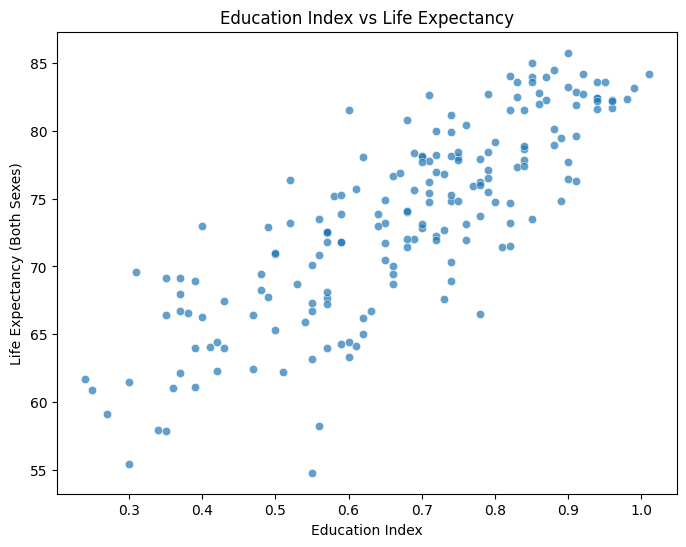

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x='education_index',
    y='life_expectancy_(both_sexes)',
    alpha=0.7
)

plt.title('Education Index vs Life Expectancy')
plt.xlabel('Education Index')
plt.ylabel('Life Expectancy (Both Sexes)')
plt.show()


In [ ]:
df_final[['education_index', 'life_expectancy_(both_sexes)']].corr()


,education_index,life_expectancy_(both_sexes)
education_index,1.000000,0.822962
life_expectancy_(both_sexes),0.822962,1.000000


In [ ]:
import scipy.stats as stats

clean_df = df_final[['education_index', 'life_expectancy_(both_sexes)']].dropna()

stats.linregress(clean_df['education_index'], clean_df['life_expectancy_(both_sexes)'])


LinregressResult(slope=np.float64(32.02963067995894), intercept=np.float64(51.96295983944506), rvalue=np.float64(0.8229621355296349), pvalue=np.float64(1.4440993170193455e-46), stderr=np.float64(1.6389220128392172), intercept_stderr=np.float64(1.1436667739379072))

# Take Aways from Education -Life Expectancy Plot
**Strong positive relationship**

The correlation between education index and life expectancy is 0.823, which indicates a strong positive relationship.
Countries with higher education levels almost always have higher life expectancy.

**Linear regression confirms the trend**

The regression slope is 32.03, meaning For every 0.1 increase in education index, life expectancy increases by roughly 3.2 years. This shows education plays a substantial role in long-term health outcomes.

**Very strong statistical significance**

The p-value is 1.44 × 10⁻⁴⁶, which is essentially zero.
This means the relationship is not random — it's statistically very strong.

**High-education countries consistently perform better**

Countries with an education index above 0.8 tend to reach 80+ years in life expectancy, forming a clear upper cluster in the scatterplot.

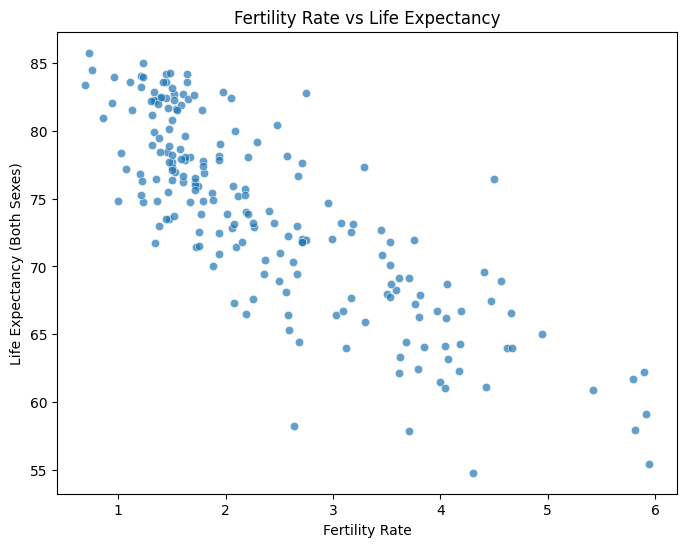

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x='fertility_rate',
    y='life_expectancy_(both_sexes)',
    alpha=0.7
)

plt.title('Fertility Rate vs Life Expectancy')
plt.xlabel('Fertility Rate')
plt.ylabel('Life Expectancy (Both Sexes)')
plt.show()


In [ ]:
import scipy.stats as stats

# Drop rows with missing values in these two columns
clean_df_fert = df_final[['fertility_rate', 'life_expectancy_(both_sexes)']].dropna()

# Linear regression
reg_result_fert = stats.linregress(
    clean_df_fert['fertility_rate'],
    clean_df_fert['life_expectancy_(both_sexes)']
)

print("Linear Regression Result (Fertility vs Life Expectancy):")
print(reg_result_fert)

# Correlation matrix
corr_matrix_fert = clean_df_fert[['fertility_rate', 'life_expectancy_(both_sexes)']].corr()
print("\nCorrelation Matrix (Fertility vs Life Expectancy):")
print(corr_matrix_fert)


Linear Regression Result (Fertility vs Life Expectancy):
LinregressResult(slope=np.float64(-4.8400407344193015), intercept=np.float64(85.53400374834926), rvalue=np.float64(-0.8169798847075245), pvalue=np.float64(3.182862681917063e-49), stderr=np.float64(0.24278929270487531), intercept_stderr=np.float64(0.6485633470763269))

Correlation Matrix (Fertility vs Life Expectancy):
                              fertility_rate  life_expectancy_(both_sexes)
fertility_rate                       1.00000                      -0.81698
life_expectancy_(both_sexes)        -0.81698                       1.00000


# Key Take Aways From Fertility - Life Expectancy Plot
The correlation between fertility rate and life expectancy is –0.817, indicating a strong negative relationship. Countries with higher fertility rates tend to have significantly shorter life expectancy, reflecting differences in healthcare access, income levels, and age structure.

The regression results reinforce this pattern. The slope is –4.84, meaning that for each additional child in a country’s fertility rate, life expectancy decreases by roughly 4.8 years on average. The p-value is extremely small, showing that this relationship is statistically very strong and not due to chance.

Overall, these results highlight fertility rate as one of the strongest predictors of life expectancy, moving in the opposite direction to education and median age.

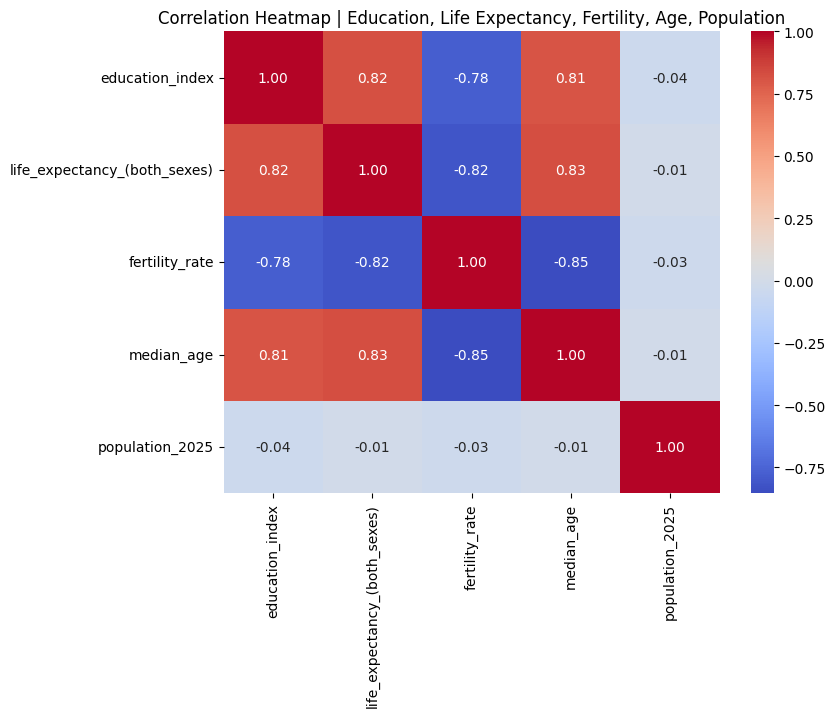

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    'education_index',
    'life_expectancy_(both_sexes)',
    'fertility_rate',
    'median_age',
    'population_2025'
]

corr = df_final[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap | Education, Life Expectancy, Fertility, Age, Population')
plt.show()


# Take Aways from Heatmap
Education index shows a strong positive relationship with both life expectancy (0.82) and median age (0.81). This means that countries with higher education levels tend to have older populations and significantly longer life expectancy. These three indicators move together in a very consistent pattern.

Fertility rate shows the opposite pattern, with strong negative correlations against life expectancy (–0.82), education index (–0.78), and median age (–0.85). Countries with high fertility tend to be younger, have lower education levels, and have shorter life expectancy, which aligns with global demographic trends.

Population size does not show any meaningful correlation with the other variables. The coefficients are all close to zero, indicating that a country’s population total is not directly related to its education levels, life expectancy, fertility, or age structure.

Overall, the heatmap supports the earlier scatterplot findings: education and life expectancy are closely linked, and fertility rate moves in the opposite direction to these development indicators.

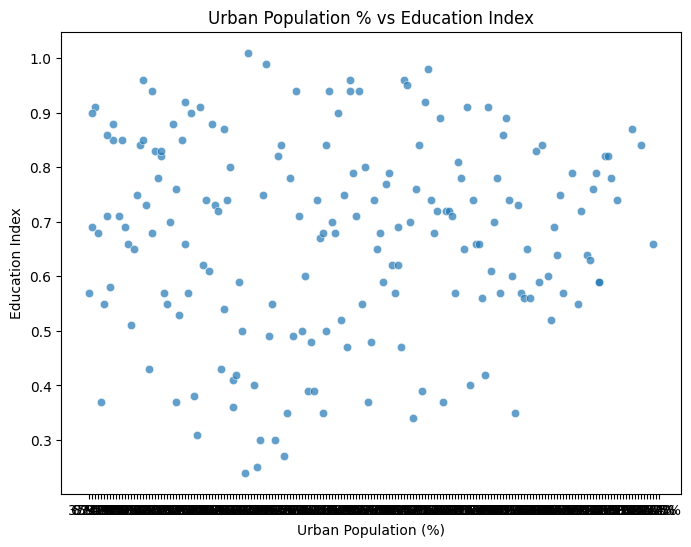

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x='urban_pop_pct',
    y='education_index',
    alpha=0.7
)

plt.title('Urban Population % vs Education Index')
plt.xlabel('Urban Population (%)')
plt.ylabel('Education Index')
plt.show()


In [ ]:
# Remove the % sign and convert to float
df_final['urban_pop_pct'] = (
    df_final['urban_pop_pct']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
)

df_final['urban_pop_pct'] = pd.to_numeric(df_final['urban_pop_pct'], errors='coerce')


In [ ]:
# Drop missing values for a clean comparison
clean_urban_df = df_final[['urban_pop_pct', 'education_index']].dropna()

# Correlation
urban_corr = clean_urban_df.corr()
print(urban_corr)


                 urban_pop_pct  education_index
urban_pop_pct         1.000000         0.543694
education_index       0.543694         1.000000


# Takeaways from Urbanisation - Education
The correlation between urban population percentage and education index is 0.54, indicating a moderate positive relationship. This suggests that countries with higher levels of urbanisation generally achieve higher education scores, likely due to better access to schools, universities, and educational infrastructure in urban areas.

Although the relationship is not as strong as the one between education and life expectancy, it still reflects a clear trend that more urbanised societies tend to have stronger educational outcomes

/tmp/ipython-input-4003567249.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


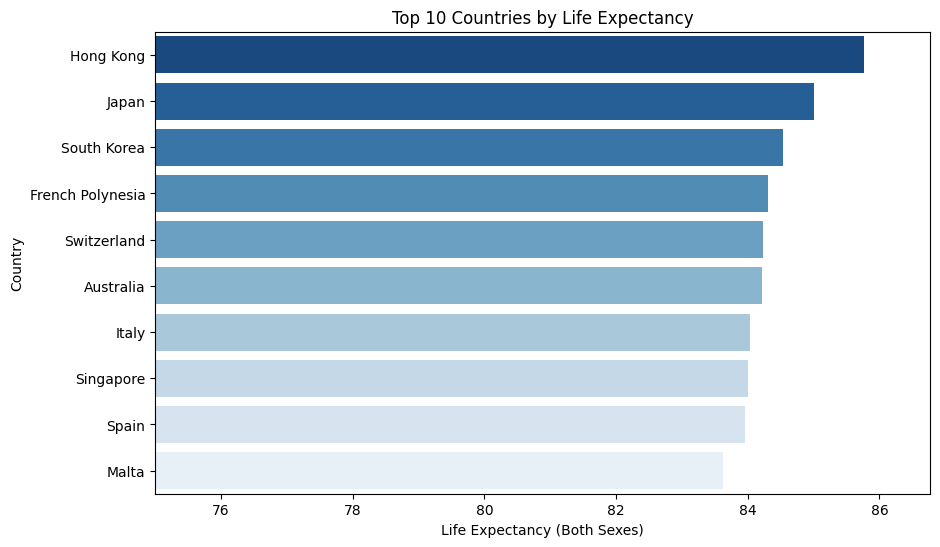

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 10 countries by life expectancy
top10_life = df_final.nlargest(10, 'life_expectancy_(both_sexes)')

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_life,
    x='life_expectancy_(both_sexes)',
    y='country',
    palette='Blues_r',
    orient='h'
)

plt.title('Top 10 Countries by Life Expectancy')
plt.xlabel('Life Expectancy (Both Sexes)')
plt.ylabel('Country')

# Start x-axis at 75 to highlight differences
plt.xlim(75, top10_life['life_expectancy_(both_sexes)'].max() + 1)

plt.show()


# Key Takeaways - Top 10 Countries by Life Expectancy

The countries with the highest life expectancy are overwhelmingly high-income, highly urbanised, and education-focused regions such as Hong Kong, Japan, South Korea and Switzerland. Once the x-axis is restricted to 75-90 years, the differences between countries become much clearer, revealing that even among the healthiest nations, variation of 2-4 years still exists. This visual supports the patterns seen earlier in the heatmap: high life expectancy tends to appear in countries with strong education scores, low fertility rates, and higher median ages. The barplot reinforces that the top performers are mostly advanced economies with strong healthcare systems and stable socio-economic conditions